In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import time

### Importing Models

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from PARAMS import FULL_DATA_NEW_MIN10_PATH, FULL_DATA_NEW_MIN14_PATH, FULL_DATA_NEW_MIN20_PATH, FULL_DATA_NEW_MIN27_PATH, FULL_DATA_NEW_END_PATH

In [4]:
dataset_20 = pd.read_csv(FULL_DATA_NEW_MIN10_PATH)
dataset_40 = pd.read_csv(FULL_DATA_NEW_MIN14_PATH)
dataset_60 = pd.read_csv(FULL_DATA_NEW_MIN20_PATH)
dataset_80 = pd.read_csv(FULL_DATA_NEW_MIN27_PATH)
dataset_100 = pd.read_csv(FULL_DATA_NEW_END_PATH)

In [5]:
dataset_20 = dataset_20.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_40 = dataset_40.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_60 = dataset_60.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_80 = dataset_80.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_100 = dataset_100.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]

### Declaring variables

In [6]:
# Independent
X_20 = dataset_20.drop(dataset_20.columns[19], axis=1)
X_40 = dataset_40.drop(dataset_40.columns[19], axis=1)
X_60 = dataset_60.drop(dataset_60.columns[19], axis=1)
X_80 = dataset_80.drop(dataset_80.columns[19], axis=1)
X_100 = dataset_100.drop(dataset_100.columns[19], axis=1)

# Dependent
y_20 = dataset_20.iloc[:, 19].values
y_40 = dataset_40.iloc[:, 19].values
y_60 = dataset_60.iloc[:, 19].values
y_80 = dataset_80.iloc[:, 19].values
y_100 = dataset_100.iloc[:, 19].values

### Print Heatmaps

#### Download chart with
plt.savefig('10_heatmap_20_1.png', dpi=300, bbox_inches='tight')

<AxesSubplot:>

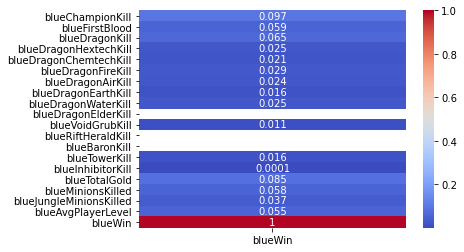

In [7]:
sns.heatmap(dataset_20.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

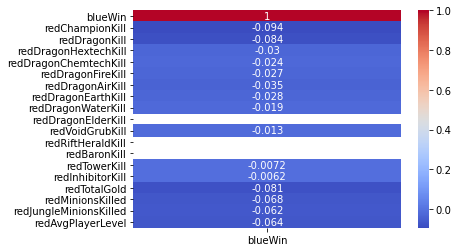

In [8]:
sns.heatmap(dataset_20.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

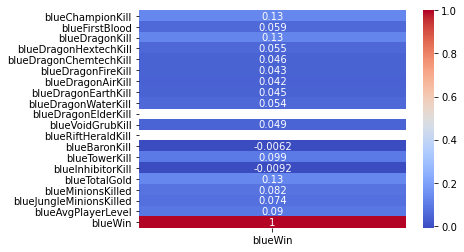

In [9]:
sns.heatmap(dataset_40.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

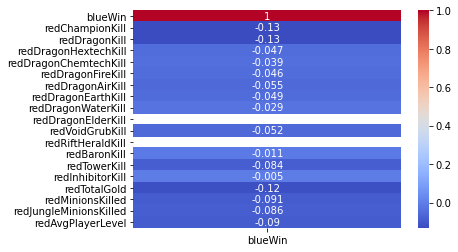

In [10]:
sns.heatmap(dataset_40.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

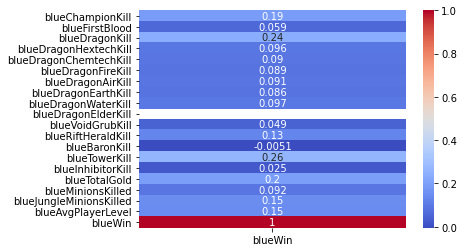

In [11]:
sns.heatmap(dataset_60.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

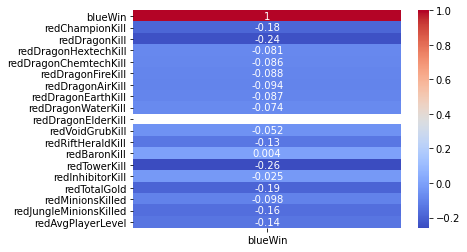

In [12]:
sns.heatmap(dataset_60.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

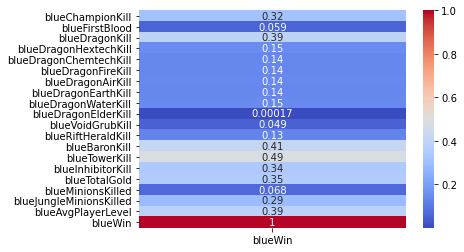

In [13]:
sns.heatmap(dataset_80.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

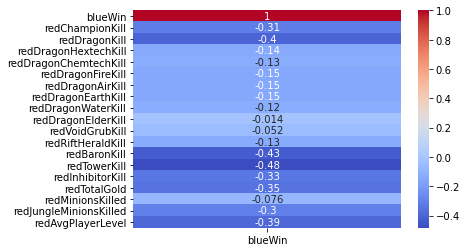

In [14]:
sns.heatmap(dataset_80.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

<AxesSubplot:>

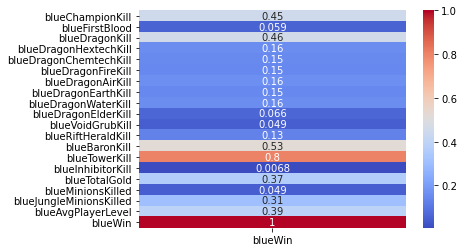

In [15]:
sns.heatmap(dataset_100.corr()[['blueWin']].head(20), annot=True, cmap='coolwarm')

<AxesSubplot:>

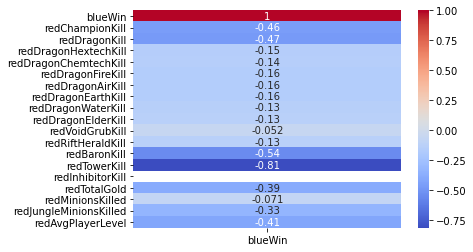

In [16]:
sns.heatmap(dataset_100.corr()[['blueWin']].tail(19), annot=True, cmap='coolwarm')

### Print Correlation Matrix

In [17]:
temporary_list = list()
for i in dataset_20:
    temporary_list.append(i)

In [18]:
correlation_matrix = dataset_20.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.09739864505460995
blueFirstBlood: 0.05853540598676922
blueDragonKill: 0.06471158902631188
blueDragonHextechKill: 0.024695457843989098
blueDragonChemtechKill: 0.020840077506073182
blueDragonFireKill: 0.029203191949983952
blueDragonAirKill: 0.023869342333256237
blueDragonEarthKill: 0.016312288690761886
blueDragonWaterKill: 0.02517790576682996
blueDragonElderKill: nan
blueVoidGrubKill: 0.011217041224692132
blueRiftHeraldKill: nan
blueBaronKill: nan
blueTowerKill: 0.015877448362328232
blueInhibitorKill: 9.969518013426449e-05
blueTotalGold: 0.08509512117414372
blueMinionsKilled: 0.05844936955656737
blueJungleMinionsKilled: 0.03707818211253151
blueAvgPlayerLevel: 0.05548155141856888
blueWin: 1.0
redChampionKill: -0.09393658426236293
redDragonKill: -0.08405386243616811
redDragonHextechKill: -0.029764086146098975
redDragonChemtechKill: -0.024061349200418167
redDragonFireKill: -0.027053506041672278
redDragonAirKill: -0.03476744131821171
redDragonEarthKill: -0.027966750636851

In [19]:
correlation_matrix = dataset_40.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.13122118426413454
blueFirstBlood: 0.05853540598676922
blueDragonKill: 0.12793011825679748
blueDragonHextechKill: 0.05510871866437069
blueDragonChemtechKill: 0.04551206990893902
blueDragonFireKill: 0.04329847036466903
blueDragonAirKill: 0.041529895748021343
blueDragonEarthKill: 0.0452970930290659
blueDragonWaterKill: 0.05390779180211271
blueDragonElderKill: nan
blueVoidGrubKill: 0.049443303402783766
blueRiftHeraldKill: nan
blueBaronKill: -0.006244234124934793
blueTowerKill: 0.09861664153709289
blueInhibitorKill: -0.009227433421840556
blueTotalGold: 0.13000886023122646
blueMinionsKilled: 0.08214834703489285
blueJungleMinionsKilled: 0.07402312692601166
blueAvgPlayerLevel: 0.090468188901832
blueWin: 1.0
redChampionKill: -0.12722710876888255
redDragonKill: -0.13157257320880214
redDragonHextechKill: -0.047042832668181676
redDragonChemtechKill: -0.03948592699786372
redDragonFireKill: -0.04584906304056833
redDragonAirKill: -0.05492367184324858
redDragonEarthKill: -0.0492376

In [20]:
correlation_matrix = dataset_60.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.19003705610863128
blueFirstBlood: 0.05853540598676922
blueDragonKill: 0.23928640204030702
blueDragonHextechKill: 0.09614530355948933
blueDragonChemtechKill: 0.09046582604525527
blueDragonFireKill: 0.08860222457648481
blueDragonAirKill: 0.09080213584256257
blueDragonEarthKill: 0.08642881678012528
blueDragonWaterKill: 0.0974895499701211
blueDragonElderKill: nan
blueVoidGrubKill: 0.049443303402783766
blueRiftHeraldKill: 0.13184132213738217
blueBaronKill: -0.005086374242464666
blueTowerKill: 0.2623417069547201
blueInhibitorKill: 0.02452744686344132
blueTotalGold: 0.19605058104338355
blueMinionsKilled: 0.09224538293028854
blueJungleMinionsKilled: 0.14914616957210933
blueAvgPlayerLevel: 0.1460108916664156
blueWin: 1.0
redChampionKill: -0.18460392898427053
redDragonKill: -0.24218028532270164
redDragonHextechKill: -0.08109669133995866
redDragonChemtechKill: -0.08588192623614892
redDragonFireKill: -0.08843426888227028
redDragonAirKill: -0.09441470175888253
redDragonEarthKill

In [21]:
correlation_matrix = dataset_80.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.3161774447558918
blueFirstBlood: 0.05853540598676922
blueDragonKill: 0.3938146695606897
blueDragonHextechKill: 0.14967245686508493
blueDragonChemtechKill: 0.13992493936690642
blueDragonFireKill: 0.14044072032187377
blueDragonAirKill: 0.14437937052006142
blueDragonEarthKill: 0.14059236691630214
blueDragonWaterKill: 0.14613395357080608
blueDragonElderKill: 0.00017269088901477285
blueVoidGrubKill: 0.049443303402783766
blueRiftHeraldKill: 0.13184132213738217
blueBaronKill: 0.41461791906397155
blueTowerKill: 0.4858660630682112
blueInhibitorKill: 0.34174148658030545
blueTotalGold: 0.35341013846931896
blueMinionsKilled: 0.06810764919109832
blueJungleMinionsKilled: 0.29048922500258517
blueAvgPlayerLevel: 0.3863120939843703
blueWin: 1.0
redChampionKill: -0.31024063637795213
redDragonKill: -0.39705746276926523
redDragonHextechKill: -0.137996868083252
redDragonChemtechKill: -0.12903768591437775
redDragonFireKill: -0.14576360957295414
redDragonAirKill: -0.1455997480638914
redDr

In [22]:
correlation_matrix = dataset_100.corr()

for i in temporary_list:
    print(i, end=": ")
    print(correlation_matrix['blueWin'][i])

blueChampionKill: 0.45129067399234024
blueFirstBlood: 0.05853540598676922
blueDragonKill: 0.45698442348156143
blueDragonHextechKill: 0.15838235120528338
blueDragonChemtechKill: 0.15067784890261213
blueDragonFireKill: 0.14895711766992506
blueDragonAirKill: 0.16210346971454231
blueDragonEarthKill: 0.15003442272183096
blueDragonWaterKill: 0.15850913064826747
blueDragonElderKill: 0.06636805625490597
blueVoidGrubKill: 0.049443303402783766
blueRiftHeraldKill: 0.13184132213738217
blueBaronKill: 0.5261334388366916
blueTowerKill: 0.8046904781287519
blueInhibitorKill: 0.006775080037577916
blueTotalGold: 0.3668817674099261
blueMinionsKilled: 0.048755065194398435
blueJungleMinionsKilled: 0.3060848403228481
blueAvgPlayerLevel: 0.39095858454339655
blueWin: 1.0
redChampionKill: -0.4569426618654467
redDragonKill: -0.467899291115953
redDragonHextechKill: -0.14901314362541868
redDragonChemtechKill: -0.13984882727341455
redDragonFireKill: -0.1591268193393816
redDragonAirKill: -0.15948757255998922
redDrag

### Logistic Regression

In [23]:
# Defining Pipeline
logisticRegression = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [24]:
# Perform Cross-Validation

start_logistic_regression = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_logistic_regression = cross_val_score(logisticRegression, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_logistic_regression = cross_val_score(logisticRegression, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_logistic_regression = cross_val_score(logisticRegression, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_logistic_regression = cross_val_score(logisticRegression, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_logistic_regression = cross_val_score(logisticRegression, X_100, y_100, cv=cv, scoring='accuracy')

end_logistic_regression = time.time()

logistic_regression_time = end_logistic_regression - start_logistic_regression

In [25]:
print(scores_20_logistic_regression)
print(scores_40_logistic_regression)
print(scores_60_logistic_regression)
print(scores_80_logistic_regression)
print(scores_100_logistic_regression)

[0.59178792 0.59657166 0.59908293 0.60007974 0.60007974]
[0.6210883  0.62866255 0.63736045 0.63556619 0.62838915]
[0.68467211 0.69264501 0.68361244 0.69457735 0.69896332]
[0.82160654 0.82021128 0.81140351 0.82097289 0.81060606]
[0.98584812 0.98724337 0.98464912 0.98644338 0.98225678]


In [26]:
print("Acurracy dataset_20: ", end="")
print(scores_20_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_logistic_regression.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_logistic_regression.mean() * 100, end="%\n")

Acurracy dataset_20: 59.75204003358279%
Acurracy dataset_40: 63.02133273186954%
Acurracy dataset_60: 69.08940463667548%
Acurracy dataset_80: 81.69600551108687%
Acurracy dataset_100: 98.52881542468526%


In [27]:
logistic_regression_accuracy = list()
logistic_regression_accuracy.append(scores_20_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_40_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_60_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_80_logistic_regression.mean() * 100)
logistic_regression_accuracy.append(scores_100_logistic_regression.mean() * 100)

### Decision Tree

In [28]:
# Defining Pipeline
decisionTree = Pipeline([
    ('classifier', DecisionTreeClassifier())
])

In [29]:
# Perform Cross-Validation

start_decision_tree = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_decision_tree = cross_val_score(decisionTree, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_decision_tree = cross_val_score(decisionTree, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_decision_tree = cross_val_score(decisionTree, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_decision_tree = cross_val_score(decisionTree, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_decision_tree = cross_val_score(decisionTree, X_100, y_100, cv=cv, scoring='accuracy')

end_decision_tree = time.time()

decision_tree_time = end_decision_tree - start_decision_tree

In [30]:
print(scores_20_decision_tree)
print(scores_40_decision_tree)
print(scores_60_decision_tree)
print(scores_80_decision_tree)
print(scores_100_decision_tree)

[0.53318716 0.51863664 0.52472089 0.53050239 0.52013557]
[0.53936616 0.54773769 0.54764753 0.53748006 0.55163477]
[0.58680486 0.60175404 0.59230463 0.590311   0.5976874 ]
[0.72493522 0.7354993  0.72926635 0.73026316 0.72587719]
[0.96053418 0.96651385 0.95454545 0.96012759 0.96072568]


In [31]:
print("Acurracy dataset_20: ", end="")
print(scores_20_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_decision_tree.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_decision_tree.mean() * 100, end="%\n")

Acurracy dataset_20: 52.54365301515518%
Acurracy dataset_40: 54.47732414734083%
Acurracy dataset_60: 59.37723860087822%
Acurracy dataset_80: 72.9168244237535%
Acurracy dataset_100: 96.04893521516476%


In [32]:
decision_tree_accuracy = list()
decision_tree_accuracy.append(scores_20_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_40_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_60_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_80_decision_tree.mean() * 100)
decision_tree_accuracy.append(scores_100_decision_tree.mean() * 100)

### Random Forest

In [33]:
# Defining Pipeline
randomForest = Pipeline([
    ('classifier', RandomForestClassifier())
])

In [34]:
# Perform Cross-Validation

start_random_forest = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_random_forest = cross_val_score(randomForest, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_random_forest = cross_val_score(randomForest, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_random_forest = cross_val_score(randomForest, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_random_forest = cross_val_score(randomForest, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_random_forest = cross_val_score(randomForest, X_100, y_100, cv=cv, scoring='accuracy')

end_random_forest = time.time()

random_forest_time = end_random_forest - start_random_forest

In [35]:
print(scores_20_random_forest)
print(scores_40_random_forest)
print(scores_60_random_forest)
print(scores_80_random_forest)
print(scores_100_random_forest)

[0.57484553 0.58521029 0.5819378  0.58054226 0.58173844]
[0.61331473 0.62886187 0.62380383 0.62998405 0.61961722]
[0.68088499 0.69184772 0.68281499 0.69198565 0.68919458]
[0.81582619 0.8186167  0.8104067  0.81638756 0.80442584]
[0.97468607 0.98026709 0.97866826 0.9784689  0.97627592]


In [36]:
print("Acurracy dataset_20: ", end="")
print(scores_20_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_random_forest.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_random_forest.mean() * 100, end="%\n")

Acurracy dataset_20: 58.0854862208523%
Acurracy dataset_40: 62.31163406459505%
Acurracy dataset_60: 68.73455848202236%
Acurracy dataset_80: 81.31325979707272%
Acurracy dataset_100: 97.76732474816883%


In [37]:
random_forest_accuracy = list()
random_forest_accuracy.append(scores_20_random_forest.mean() * 100)
random_forest_accuracy.append(scores_40_random_forest.mean() * 100)
random_forest_accuracy.append(scores_60_random_forest.mean() * 100)
random_forest_accuracy.append(scores_80_random_forest.mean() * 100)
random_forest_accuracy.append(scores_100_random_forest.mean() * 100)

### KNN

In [38]:
# Defining Pipeline
KNN = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [39]:
# Perform Cross-Validation

start_knn = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_knn = cross_val_score(KNN, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_knn = cross_val_score(KNN, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_knn = cross_val_score(KNN, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_knn = cross_val_score(KNN, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_knn = cross_val_score(KNN, X_100, y_100, cv=cv, scoring='accuracy')

end_knn = time.time()

knn_time = end_knn - start_knn

In [40]:
print(scores_20_knn)
print(scores_40_knn)
print(scores_60_knn)
print(scores_80_knn)
print(scores_100_knn)

[0.54454853 0.54315328 0.5372807  0.54007177 0.54764753]
[0.5692645  0.57046043 0.56678628 0.57954545 0.55681818]
[0.61789914 0.62128762 0.61981659 0.62739234 0.62699362]
[0.77616105 0.77237393 0.77452153 0.77751196 0.76973684]
[0.94219653 0.94179789 0.94457735 0.94417863 0.93779904]


In [41]:
print("Acurracy dataset_20: ", end="")
print(scores_20_knn.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_knn.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_knn.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_knn.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_knn.mean() * 100, end="%\n")

Acurracy dataset_20: 54.254036276659356%
Acurracy dataset_40: 56.85749710950869%
Acurracy dataset_60: 62.26778633666268%
Acurracy dataset_80: 77.40610631985221%
Acurracy dataset_100: 94.21098885797858%


In [42]:
knn_accuracy = list()
knn_accuracy.append(scores_20_knn.mean() * 100)
knn_accuracy.append(scores_40_knn.mean() * 100)
knn_accuracy.append(scores_60_knn.mean() * 100)
knn_accuracy.append(scores_80_knn.mean() * 100)
knn_accuracy.append(scores_100_knn.mean() * 100)

### Naive Bayes (GaussianNB)

In [43]:
# Defining Pipeline
naiveBayes = Pipeline([
    ('classifier', GaussianNB())
])

In [44]:
# Perform Cross-Validation

start_naive_bayes = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_naive_bayes = cross_val_score(naiveBayes, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_naive_bayes = cross_val_score(naiveBayes, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_naive_bayes = cross_val_score(naiveBayes, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_naive_bayes = cross_val_score(naiveBayes, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_naive_bayes = cross_val_score(naiveBayes, X_100, y_100, cv=cv, scoring='accuracy')

end_naive_bayes = time.time()

naive_bayes_time = end_naive_bayes - start_naive_bayes

In [45]:
print(scores_20_naive_bayes)
print(scores_40_naive_bayes)
print(scores_60_naive_bayes)
print(scores_80_naive_bayes)
print(scores_100_naive_bayes)

[0.56169025 0.54235599 0.57276715 0.55681818 0.56399522]
[0.58820012 0.58660554 0.60027911 0.59988038 0.5992823 ]
[0.66414192 0.67171617 0.66905901 0.6722488  0.67503987]
[0.80486346 0.80645804 0.79964115 0.8062201  0.79964115]
[0.94339247 0.94558501 0.94597289 0.94657097 0.94039075]


In [46]:
print("Acurracy dataset_20: ", end="")
print(scores_20_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_naive_bayes.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_naive_bayes.mean() * 100, end="%\n")

Acurracy dataset_20: 55.95253570078638%
Acurracy dataset_40: 59.4849489407466%
Acurracy dataset_60: 67.04411539839505%
Acurracy dataset_80: 80.33647798442234%
Acurracy dataset_100: 94.43824171660056%


In [47]:
naive_bayes_accuracy = list()
naive_bayes_accuracy.append(scores_20_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_40_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_60_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_80_naive_bayes.mean() * 100)
naive_bayes_accuracy.append(scores_100_naive_bayes.mean() * 100)

### Support Vector Machine

In [48]:
# Defining Pipeline
supportVectorMachine = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

In [49]:
# Perform Cross-Validation

start_svm = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_support_vector_machine = cross_val_score(supportVectorMachine, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_support_vector_machine = cross_val_score(supportVectorMachine, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_support_vector_machine = cross_val_score(supportVectorMachine, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_support_vector_machine = cross_val_score(supportVectorMachine, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_support_vector_machine = cross_val_score(supportVectorMachine, X_100, y_100, cv=cv, scoring='accuracy')

end_svm = time.time()

svm_time = end_svm - start_svm

In [50]:
print(scores_20_support_vector_machine)
print(scores_40_support_vector_machine)
print(scores_60_support_vector_machine)
print(scores_80_support_vector_machine)
print(scores_100_support_vector_machine)

[0.58381503 0.58740283 0.5935008  0.59070973 0.58413078]
[0.62726729 0.62447678 0.63217703 0.62838915 0.62599681]
[0.68387483 0.69224636 0.68361244 0.69158692 0.69397927]
[0.81702212 0.81762009 0.81100478 0.81838118 0.80781499]
[0.97986845 0.98465218 0.9826555  0.98225678 0.97986443]


In [51]:
print("Acurracy dataset_20: ", end="")
print(scores_20_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_support_vector_machine.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_support_vector_machine.mean() * 100, end="%\n")

Acurracy dataset_20: 58.7911833418689%
Acurracy dataset_40: 62.766141371331095%
Acurracy dataset_60: 68.90599632700174%
Acurracy dataset_80: 81.43686346803642%
Acurracy dataset_100: 98.18594688744075%


In [52]:
support_vector_machine_accuracy = list()
support_vector_machine_accuracy.append(scores_20_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_40_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_60_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_80_support_vector_machine.mean() * 100)
support_vector_machine_accuracy.append(scores_100_support_vector_machine.mean() * 100)

### Neural Network

In [53]:
# Defining Pipeline (MLP: Multi-layer Perceptron)
MLP = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42))
])

In [54]:
# Perform Cross-Validation

start_neural_network = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_mlp = cross_val_score(MLP, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_mlp = cross_val_score(MLP, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_mlp = cross_val_score(MLP, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_mlp = cross_val_score(MLP, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_mlp = cross_val_score(MLP, X_100, y_100, cv=cv, scoring='accuracy')

end_neural_network = time.time()

neural_network_time = end_neural_network - start_neural_network

In [55]:
print(scores_20_mlp)
print(scores_20_mlp)
print(scores_20_mlp)
print(scores_20_mlp)
print(scores_20_mlp)

[0.54116006 0.54395057 0.54106858 0.53787879 0.54764753]
[0.54116006 0.54395057 0.54106858 0.53787879 0.54764753]
[0.54116006 0.54395057 0.54106858 0.53787879 0.54764753]
[0.54116006 0.54395057 0.54106858 0.53787879 0.54764753]
[0.54116006 0.54395057 0.54106858 0.53787879 0.54764753]


In [56]:
print("Acurracy dataset_20: ", end="")
print(scores_20_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_mlp.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_mlp.mean() * 100, end="%\n")

Acurracy dataset_20: 54.234110404211%
Acurracy dataset_40: 56.82566991527054%
Acurracy dataset_60: 61.98861430943404%
Acurracy dataset_80: 75.20133857484235%
Acurracy dataset_100: 98.15804097011151%


In [57]:
neural_network_accuracy = list()
neural_network_accuracy.append(scores_20_mlp.mean() * 100)
neural_network_accuracy.append(scores_40_mlp.mean() * 100)
neural_network_accuracy.append(scores_60_mlp.mean() * 100)
neural_network_accuracy.append(scores_80_mlp.mean() * 100)
neural_network_accuracy.append(scores_100_mlp.mean() * 100)

### Ada Boost

In [58]:
# Defining Pipeline
adaBoost = Pipeline([
    ('mlp', AdaBoostClassifier())
])

In [59]:
# Perform Cross-Validation

start_ada_boost = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_ada_boost = cross_val_score(adaBoost, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_ada_boost = cross_val_score(adaBoost, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_ada_boost = cross_val_score(adaBoost, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_ada_boost = cross_val_score(adaBoost, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_ada_boost = cross_val_score(adaBoost, X_100, y_100, cv=cv, scoring='accuracy')

end_ada_boost = time.time()

ada_boost_time = end_ada_boost - start_ada_boost

In [60]:
print(scores_20_ada_boost)
print(scores_40_ada_boost)
print(scores_60_ada_boost)
print(scores_80_ada_boost)
print(scores_100_ada_boost)

[0.58540961 0.59378114 0.59549442 0.58791866 0.59748804]
[0.61072354 0.6228822  0.62639553 0.62599681 0.62579745]
[0.68686466 0.69722942 0.68460925 0.68979266 0.69657097]
[0.81662348 0.81542755 0.81080542 0.81419458 0.80901116]
[0.975882   0.97847319 0.97767145 0.976874   0.97567783]


In [61]:
print("Acurracy dataset_20: ", end="")
print(scores_20_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_ada_boost.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_ada_boost.mean() * 100, end="%\n")

Acurracy dataset_20: 59.20183735745038%
Acurracy dataset_40: 62.23591066291674%
Acurracy dataset_60: 69.10133933779854%
Acurracy dataset_80: 81.32124381568377%
Acurracy dataset_100: 97.69156955664936%


In [62]:
ada_boost_accuracy = list()
ada_boost_accuracy.append(scores_20_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_40_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_60_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_80_ada_boost.mean() * 100)
ada_boost_accuracy.append(scores_100_ada_boost.mean() * 100)

### Gradient Boosting

In [63]:
# Defining Pipeline
gradientBoosting = Pipeline([
    ('mlp', GradientBoostingClassifier())
])

In [64]:
# Perform Cross-Validation

start_gradient_boosting = time.time()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_20_gradient_boosting = cross_val_score(gradientBoosting, X_20, y_20, cv=cv, scoring='accuracy')
scores_40_gradient_boosting = cross_val_score(gradientBoosting, X_40, y_40, cv=cv, scoring='accuracy')
scores_60_gradient_boosting = cross_val_score(gradientBoosting, X_60, y_60, cv=cv, scoring='accuracy')
scores_80_gradient_boosting = cross_val_score(gradientBoosting, X_80, y_80, cv=cv, scoring='accuracy')
scores_100_gradient_boosting = cross_val_score(gradientBoosting, X_100, y_100, cv=cv, scoring='accuracy')

end_gradient_boosting = time.time()

gradient_boosting_time = end_gradient_boosting - start_gradient_boosting

In [65]:
print(scores_20_gradient_boosting)
print(scores_40_gradient_boosting)
print(scores_60_gradient_boosting)
print(scores_80_gradient_boosting)
print(scores_100_gradient_boosting)

[0.5880008  0.59856488 0.59330144 0.59688995 0.5935008 ]
[0.62686865 0.62886187 0.62579745 0.62938596 0.62599681]
[0.6854694  0.69503687 0.69019139 0.69218501 0.69457735]
[0.81742077 0.81742077 0.81598884 0.81798246 0.80821372]
[0.97687861 0.97927048 0.97826954 0.97866826 0.97627592]


In [66]:
print("Acurracy dataset_20: ", end="")
print(scores_20_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_40: ", end="")
print(scores_40_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_60: ", end="")
print(scores_60_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_80: ", end="")
print(scores_80_gradient_boosting.mean() * 100, end="%\n")
print("Acurracy dataset_100: ", end="")
print(scores_100_gradient_boosting.mean() * 100, end="%\n")

Acurracy dataset_20: 59.40515723414394%
Acurracy dataset_40: 62.738214790605085%
Acurracy dataset_60: 69.14920053317921%
Acurracy dataset_80: 81.5405309348534%
Acurracy dataset_100: 97.78725618383938%


In [67]:
gradient_boosting_accuracy = list()
gradient_boosting_accuracy.append(scores_20_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_40_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_60_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_80_gradient_boosting.mean() * 100)
gradient_boosting_accuracy.append(scores_100_gradient_boosting.mean() * 100)

### Own Algorithm

In [68]:
dataset_20 = pd.read_csv(FULL_DATA_NEW_MIN10_PATH)
dataset_40 = pd.read_csv(FULL_DATA_NEW_MIN14_PATH)
dataset_60 = pd.read_csv(FULL_DATA_NEW_MIN20_PATH)
dataset_80 = pd.read_csv(FULL_DATA_NEW_MIN27_PATH)
dataset_100 = pd.read_csv(FULL_DATA_NEW_END_PATH)

In [69]:
dataset_20 = dataset_20.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_40 = dataset_40.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_60 = dataset_60.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_80 = dataset_80.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]
dataset_100 = dataset_100.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]]

In [70]:
# Independent
X_20 = dataset_20.drop(dataset_20.columns[19], axis=1)
X_40 = dataset_40.drop(dataset_40.columns[19], axis=1)
X_60 = dataset_60.drop(dataset_60.columns[19], axis=1)
X_80 = dataset_80.drop(dataset_80.columns[19], axis=1)
X_100 = dataset_100.drop(dataset_100.columns[19], axis=1)

# Dependent
y_20 = dataset_20.iloc[:, 19].values
y_40 = dataset_40.iloc[:, 19].values
y_60 = dataset_60.iloc[:, 19].values
y_80 = dataset_80.iloc[:, 19].values
y_100 = dataset_100.iloc[:, 19].values

In [71]:
def ownAlgo(correlations, X_test, y_test):
    correct = 0
    incorrect = 0
    list_with_correlations_x = list()
    list_with_correlation_variables = list()
    
    list_with_normalized_correlations_x = list()
    sum = 0
    
    list_with_function_values = list()
    ultimate_list_with_function_values = list()
    
    list_of_probabilities_blueWin = list()
    probability_blueWin = 0
    boolean_list_of_probabilities_blueWin = list()
    
    
    
    
    in_function_correlations = correlations.fillna(0)
    
    for i in range(0,19):
        list_with_correlations_x.append((abs(in_function_correlations.loc[blueWin_correlations_100_1.index[i+19], 'blueWin']) + abs(in_function_correlations.loc[blueWin_correlations_100_1.index[i], 'blueWin']))/2)
    
    # list_with_correlations_x
    
    for i in list_with_correlations_x:
        sum += i
    
    for i in list_with_correlations_x:
        list_with_normalized_correlations_x.append(i/sum)
        
    # list_with_normalized_correlations_x
    
    # function: f(b,r)
    for i in range(0, len(X_test)):
        for j in range(0,19):
            b = X_test.iloc[i, :][j]
            r = X_test.iloc[i, :][j+19]
            list_with_function_values.append((b+1)/(b+r+2))
    
    ultimate_list_with_function_values = [list_with_function_values[i:i + 19] for i in range(0, len(list_with_function_values), 19)]
    
    for current_lwfv in ultimate_list_with_function_values:
        for i in range(0,19):
            probability_blueWin += list_with_normalized_correlations_x[i] * current_lwfv[i]
        list_of_probabilities_blueWin.append(probability_blueWin)
        probability_blueWin = 0
    
    for i in list_of_probabilities_blueWin:
        if i < 0.5:
            boolean_list_of_probabilities_blueWin.append(False)
        else:
            boolean_list_of_probabilities_blueWin.append(True)
            
    for i in range(0,len(X_20_test_1)):
        if boolean_list_of_probabilities_blueWin[i] == y_20_test_1[i]:
            correct += 1
        else:
            incorrect += 1
            
    return correct/(correct + incorrect)

In [72]:
# 20
X_20_train_1 = X_20[0:len(X_20)//5*4]
X_20_test_1 = X_20[len(X_20)//5*4:]

y_20_train_1 = y_20[0:len(y_20)//5*4]
y_20_test_1 = y_20[len(y_20)//5*4:]

# 40
X_40_train_1 = X_40[0:len(X_40)//5*4]
X_40_test_1 = X_40[len(X_40)//5*4:]

y_40_train_1 = y_40[0:len(y_40)//5*4]
y_40_test_1 = y_40[len(y_40)//5*4:]

# 60
X_60_train_1 = X_60[0:len(X_60)//5*4]
X_60_test_1 = X_60[len(X_60)//5*4:]

y_60_train_1 = y_60[0:len(y_60)//5*4]
y_60_test_1 = y_60[len(y_60)//5*4:]

# 80
X_80_train_1 = X_80[0:len(X_80)//5*4]
X_80_test_1 = X_80[len(X_80)//5*4:]

y_80_train_1 = y_80[0:len(y_80)//5*4]
y_80_test_1 = y_80[len(y_80)//5*4:]

# 100
X_100_train_1 = X_100[0:len(X_100)//5*4]
X_100_test_1 = X_100[len(X_100)//5*4:]

y_100_train_1 = y_100[0:len(y_100)//5*4]
y_100_test_1 = y_100[len(y_100)//5*4:]

In [73]:
corr_dataset_20_1 = dataset_20[:len(dataset_20)//5*4]
correlations_20_1 = corr_dataset_20_1.corr()
blueWin_correlations_20_1 = correlations_20_1[['blueWin']]

corr_dataset_40_1 = dataset_40[:len(dataset_40)//5*4]
correlations_40_1 = corr_dataset_40_1.corr()
blueWin_correlations_40_1 = correlations_40_1[['blueWin']]

corr_dataset_60_1 = dataset_60[:len(dataset_60)//5*4]
correlations_60_1 = corr_dataset_60_1.corr()
blueWin_correlations_60_1 = correlations_60_1[['blueWin']]

corr_dataset_80_1 = dataset_80[:len(dataset_80)//5*4]
correlations_80_1 = corr_dataset_80_1.corr()
blueWin_correlations_80_1 = correlations_80_1[['blueWin']]

corr_dataset_100_1 = dataset_100[:len(dataset_100)//5*4]
correlations_100_1 = corr_dataset_100_1.corr()
blueWin_correlations_100_1 = correlations_100_1[['blueWin']]

In [74]:
start_own_algorithm = time.time()

result_20_1 = ownAlgo(correlations_20_1, X_20_test_1, y_20_test_1)
result_40_1 = ownAlgo(correlations_40_1, X_40_test_1, y_40_test_1)
result_60_1 = ownAlgo(correlations_60_1, X_60_test_1, y_60_test_1)
result_80_1 = ownAlgo(correlations_80_1, X_80_test_1, y_80_test_1)
result_100_1 = ownAlgo(correlations_100_1, X_100_test_1, y_100_test_1)

print(result_20_1)
print(result_40_1)
print(result_60_1)
print(result_80_1)
print(result_100_1)

end_own_algorithm = time.time()

own_algorithm_time = end_own_algorithm - start_own_algorithm

0.5900757273814269
0.6251494619370267
0.6783579115185333
0.8074930251096054
0.9125149461937027


In [75]:
own_algorithm_accuracy = list()
own_algorithm_accuracy.append(result_20_1 * 100)
own_algorithm_accuracy.append(result_40_1 * 100)
own_algorithm_accuracy.append(result_60_1 * 100)
own_algorithm_accuracy.append(result_80_1 * 100)
own_algorithm_accuracy.append(result_100_1 * 100)

### Line Chart (Accuracy)

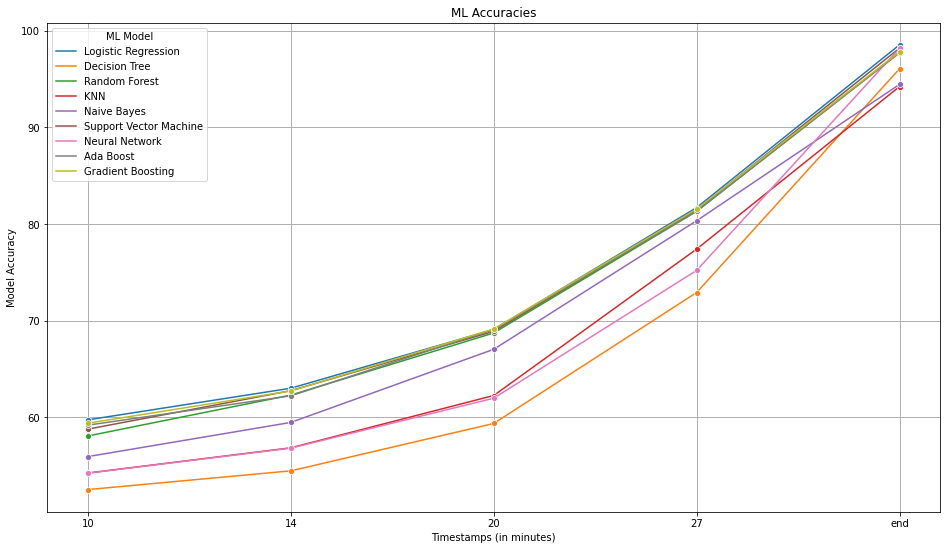

In [79]:
time_intervals = ['10', '14', '20', '27', 'end']

data = pd.DataFrame({
    'Time Interval': time_intervals,
    'Logistic Regression': logistic_regression_accuracy,
    'Decision Tree': decision_tree_accuracy,
    'Random Forest': random_forest_accuracy,
    'KNN': knn_accuracy,
    'Naive Bayes': naive_bayes_accuracy,
    'Support Vector Machine': support_vector_machine_accuracy,
    'Neural Network': neural_network_accuracy,
    'Ada Boost': ada_boost_accuracy,
    'Gradient Boosting': gradient_boosting_accuracy,
    'Own Algorithm': own_algorithm_accuracy
})

data_long = pd.melt(data, id_vars=['Time Interval'],
                    value_vars=[
                        'Logistic Regression',
                        'Decision Tree',
                        'Random Forest',
                        'KNN',
                        'Naive Bayes',
                        'Support Vector Machine',
                        'Neural Network',
                        'Ada Boost',
                        'Gradient Boosting',
                        'Own Algorithm'
                    ],
                    var_name='ML Model',
                    value_name='Score')

plt.figure(figsize=(16,9))
sns.lineplot(x='Time Interval', y='Score', hue='ML Model', data=data_long, marker='o')

plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=1)

plt.xlabel('Timestamps (in minutes)')
plt.ylabel('Model Accuracy')
plt.title('ML Accuracies')

#plt.savefig('11_accuracy_with_own_algorithm.png', dpi=300, bbox_inches='tight')
plt.show()

In [77]:
list_with_times = [
                    logistic_regression_time,
                    decision_tree_time,
                    random_forest_time,
                    knn_time, 
                    naive_bayes_time, 
                    svm_time, 
                    neural_network_time, 
                    ada_boost_time, 
                    gradient_boosting_time,
                    own_algorithm_time
                 ]
print(list_with_times)

[1.7945411205291748, 8.147497415542603, 122.86902713775635, 7.159148216247559, 0.5664865970611572, 518.8291029930115, 768.5916135311127, 32.860222578048706, 130.238356590271, 90.28854489326477]


In [80]:
ML_models_time = {
                    'Logistic Regression': int(list_with_times[0]),
                    'Decision Tree': int(list_with_times[1]),
                    'Random Forest': int(list_with_times[2]),
                    'KNN': int(list_with_times[3]),
                    'Naive Bayes': int(list_with_times[4]),
                    'SVM': int(list_with_times[5]),
                    'Neural Network': int(list_with_times[6]),
                    'Ada Boost': int(list_with_times[7]),
                    'Gradient Boosting': int(list_with_times[8]),
                    'Own Algorithm': int(list_with_times[9])
                }

ML_models = list(ML_models_time.keys())
time_durations = list(ML_models_time.values())

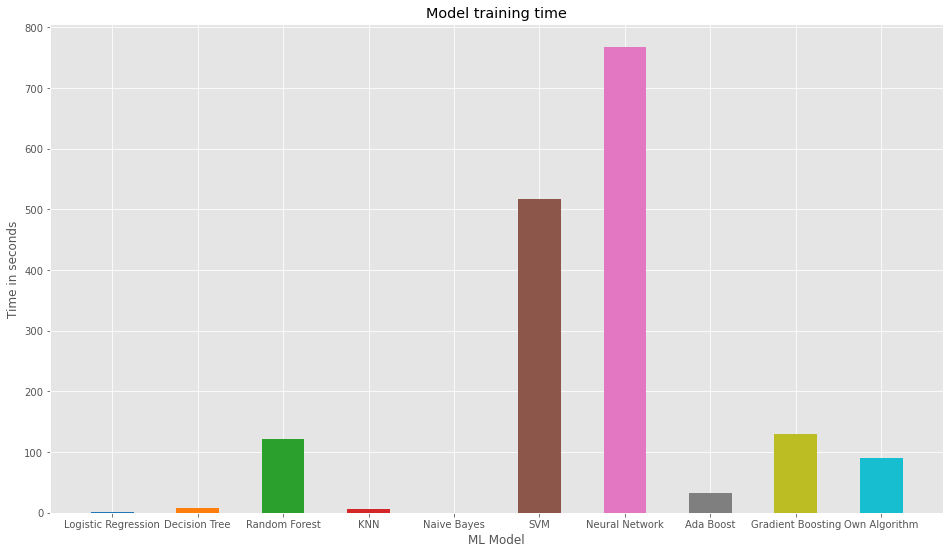

In [82]:
from matplotlib import style

style.use('ggplot')
plt.figure(figsize=(16,9))
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
plt.bar(ML_models, time_durations, color=color, width=0.5)
plt.xlabel('ML Model')
plt.ylabel('Time in seconds')
plt.title('Model training time')

#plt.savefig('11_model_training-time.png', dpi=300, bbox_inches='tight')